# Offline diagnostics for the CASTLE single output networks following Rasp et al. (2018) architecture

# Profile Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_models, get_save_plot_folder, load_single_model
from neural_networks.model_diagnostics import ModelDiagnostics
from pathlib import Path
from utils.variable import Variable_Lev_Metadata

In [6]:
import matplotlib.pyplot as plt
import gc

## Load trained CASTLE models

In [7]:
PROJECT_ROOT = Path.cwd().parent.resolve()
base_dir = os.path.join(PROJECT_ROOT, "output_castle", "training_29_castle_adapted") 

cfg = os.path.join(base_dir, "cfg_castle_adapted.yml")
argv  = ["-c", cfg]
plot_dir = Path(base_dir, "plots_offline_evaluation", "plots_profiles")


In [8]:
# argv  = ["-c", "../output_castle/eval_nando/single_nn/cfg_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/single_nn/plots_offline_evaluation/plots_profiles")

# argv  = ["-c", "../output_castle/eval_nando/causal_single_nn/cfg_causal_single_nn_diagnostics.yml"]
# plot_dir = Path("../output_castle/eval_nando/causal_single_nn/plots_offline_evaluation/plots_profiles")

In [9]:
setup = SetupDiagnostics(argv)

### Load only models for specific variable

In [8]:
var = "phq" # tphystnd, phq

In [9]:
var_list = list()
for spcam_var in castle_setup.spcam_outputs:
    if var not in spcam_var.name:
        continue
    if spcam_var.dimensions == 3:
        var_levels = [castle_setup.children_idx_levs, castle_setup.parents_idx_levs] \
                [spcam_var.type == 'in']
        for level, _ in var_levels:
            var_name = f"{spcam_var.name}-{round(level, 2)}"
            var_list.append(var_name)

In [10]:
models = {setup.nn_type: dict()}
for v in var_list:
    models[setup.nn_type].update(load_single_model(setup, v))



Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/run_1/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/0_0_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/run_1/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/0_1_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/run_1/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/0_2_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_28_custom_mirrored_functional/models_castle/run_1/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_25

### Load all models

In [10]:
models = load_models(setup, skip_causal_phq=True)


Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_29_castle_adapted/models/CASTLEAdapted/r1.0-a1.0-lpred1000.0-lspar1.0-lrec1.0-lacy1.0-NOTEARS-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_0_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_29_castle_adapted/models/CASTLEAdapted/r1.0-a1.0-lpred1000.0-lspar1.0-lrec1.0-lacy1.0-NOTEARS-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_1_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_29_castle_adapted/models/CASTLEAdapted/r1.0-a1.0-lpred1000.0-lspar1.0-lrec1.0-lacy1.0-NOTEARS-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_18/1_2_model.keras

Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_29_castle_adapted/models/CASTLEAdapted/r1.0-a1.0-lpr

In [11]:
model_key = setup.nn_type

In [12]:
len(models[model_key])

65

In [14]:
# Note: keys are variables not strings
# Note: keys are variables not strings
if setup.nn_type == "CausalSingleNN":
    print(models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys())
else: 
    print(models[model_key].keys())

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

## Profile plots

In [15]:
# This variable does not exist in the code (but key nn_type is the same)
setup.model_type = model_key

In [16]:
if setup.nn_type == "CausalSingleNN":
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key][setup.pc_alphas[0]][setup.thresholds[0]])
else: 
    md = ModelDiagnostics(setup=setup, 
                          models=models[model_key]) 

In [17]:
md

In [18]:
if setup.nn_type == "CausalSingleNN":
    dict_keys = models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys()
else: 
    dict_keys = models[model_key].keys()

### Single Variable

In [16]:
var = Variable_Lev_Metadata.parse_var_name("tphystnd-0")
var_keys = [k for k in dict_keys if var.var.value in str(k)]
unit = "K/s"
# phq unit "kg/(kg*s)"

In [ ]:
i_time = "range"
n_time = 1440
stats = "mse"
fig = md.plot_double_profile(var, var_keys, itime=i_time, nTime=n_time, 
                                     lats=[-90, 90], lons=[0., 359.], save=plot_dir, 
                                     stats=stats, show_plot=True, unit=unit)
fig.show()

In [ ]:
plt.close()


Plotting double_profiles for variable tphystnd

Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystn

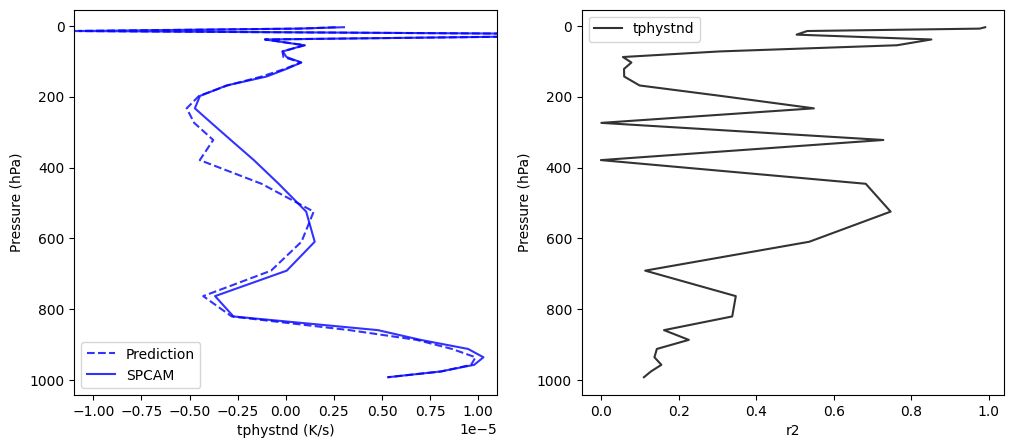

In [18]:
i_time = "range"
n_time = 1440
stats = "r2"
fig = md.plot_double_profile(var, var_keys, itime=i_time, nTime=n_time, 
                                     lats=[-90, 90], lons=[0., 359.], save=plot_dir, 
                                     stats=stats, show_plot=True, unit=unit)
fig.show()

In [ ]:
plt.close()

### All variables 3d variables

In [19]:
# only 3d
# tphystnd unit "K/s"
# phq unit "kg/(kg*s)"
var_unit_str_three_d = [("tphystnd-3.64", "K/s"), ("phq-14.35", "kg/(kg*s)")]  # "phq-14.35", "phq-3.64"
three_d_keys = [(Variable_Lev_Metadata.parse_var_name(var_str), unit) for var_str, unit in var_unit_str_three_d]

if setup.nn_type == "CausalSingleNN":
    dict_keys = models[model_key][setup.pc_alphas[0]][setup.thresholds[0]].keys()
else: 
    dict_keys = models[model_key].keys()

In [21]:
# Not function parameters, uses variables that are set in Notebook cells!!
def run_plot_profiles():
    for var, unit in three_d_keys:
        print(f"\n\n---- Variable {var}")
        var_keys = [k for k in dict_keys if var.var.value in str(k)]
        
        _ = md.plot_double_profile(var, var_keys, itime=i_time, nTime=n_time, 
                                   lats=lats, lons=lons, save=plot_dir, 
                                   stats=stats, show_plot=False, unit=unit)
        plt.close()
        gc.collect()

#### Time range, 5 steps, mse

In [19]:
i_time = "range"
n_time = 5
lats=[-90, 90]
lons=[0., 359.]
stats = "mse"

run_plot_profiles()



---- Variable phq-3.64

Plotting double_profiles for variable phq

Test batch size = 8192.
Time samples: 5

Processing variable phq-3.64.
Test batch size = 8192.
Time samples: 5

Processing variable phq-7.59.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in double_scalars


Time samples: 5

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in double_scalars


Time samples: 5

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 5

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 5

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 5

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 5

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 5

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 5

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 5

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 5

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 5

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 5

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 5

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 5

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 5

Processing variable phq-379.1.
Test batc

#### Time range, 5 steps, r2

In [23]:
i_time = "range"
n_time = 5
lats=[-90, 90]
lons=[0., 359.]
stats = "r2"

run_plot_profiles()

tphystnd-3.64

Plotting double_profiles for variable tphystnd

Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 5

Processing variable tphystnd-168.23.
Test batch s

divide by zero encountered in divide
divide by zero encountered in double_scalars


Time samples: 5

Processing variable phq-14.36.
Test batch size = 8192.


divide by zero encountered in divide
divide by zero encountered in double_scalars


Time samples: 5

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 5

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 5

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 5

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 5

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 5

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 5

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 5

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 5

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 5

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 5

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 5

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 5

Processing variable phq-322.24.
Test batch size = 8192.
Time samples: 5

Processing variable phq-379.1.
Test batc

#### Time range, 1440 steps, mse

In [ ]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
i_time = "range"
n_time = 1440
lats=[-90, 90]
lons=[0., 359.]
stats = "mse" 

run_plot_profiles()

#### Time range, 1440 steps, r2

In [ ]:
# Time step CAM=30min
# Time step SRM=20sec
# (30*60sec)/20sec = 90 
# Or: 120 as Nando did
i_time = "range"
n_time = 1440
lats=[-90, 90]
lons=[0., 359.]
stats = "r2"

run_plot_profiles()

#### Time range, 1440 steps, all metrics

In [22]:
i_time = "range"
n_time = 1440
lats=[-90, 90]
lons=[0., 359.]
stats = ["r2", "mse"]

run_plot_profiles()



---- Variable tphystnd-3.64

Plotting double_profiles for variable tphystnd

Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-3.64.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-7.59.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable tphystnd-142.99.
Test batch size = 8192.
Time samples: 144

divide by zero encountered in divide
divide by zero encountered in double_scalars



Processing variable phq-7.59.
Test batch size = 8192.
Time samples: 1440


divide by zero encountered in divide
divide by zero encountered in double_scalars



Processing variable phq-14.36.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-24.61.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-38.27.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-54.6.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-72.01.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-87.82.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-103.32.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-121.55.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-142.99.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-168.23.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-197.91.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-232.83.
Test batch size = 8192.
Time samples: 1440

Processing variable phq-273.91.
Test batch size = 8192.
Time samples: 1440

Processing variabl